# Assignment 2


##  Data pre-processing


In [20]:
#Setting
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
data_file = 'data.csv'
df = pd.read_csv(data_file)
col_names = ['age', 'income','student' ,'credit_rating','class_buys_computer']
df.head()

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes


# **Q1 (a)**



In [22]:
#data preprocessing -> Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype = int)
enc.fit(df[col_names])
df_enc = enc.transform(df[col_names])
df_enc


array([[2, 0, 0, 1, 0],
       [2, 0, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [1, 2, 0, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1],
       [2, 2, 0, 1, 0],
       [2, 1, 1, 1, 1],
       [1, 2, 1, 1, 1],
       [2, 2, 1, 0, 1],
       [0, 2, 0, 0, 1],
       [0, 0, 1, 1, 1],
       [1, 2, 0, 0, 0]])

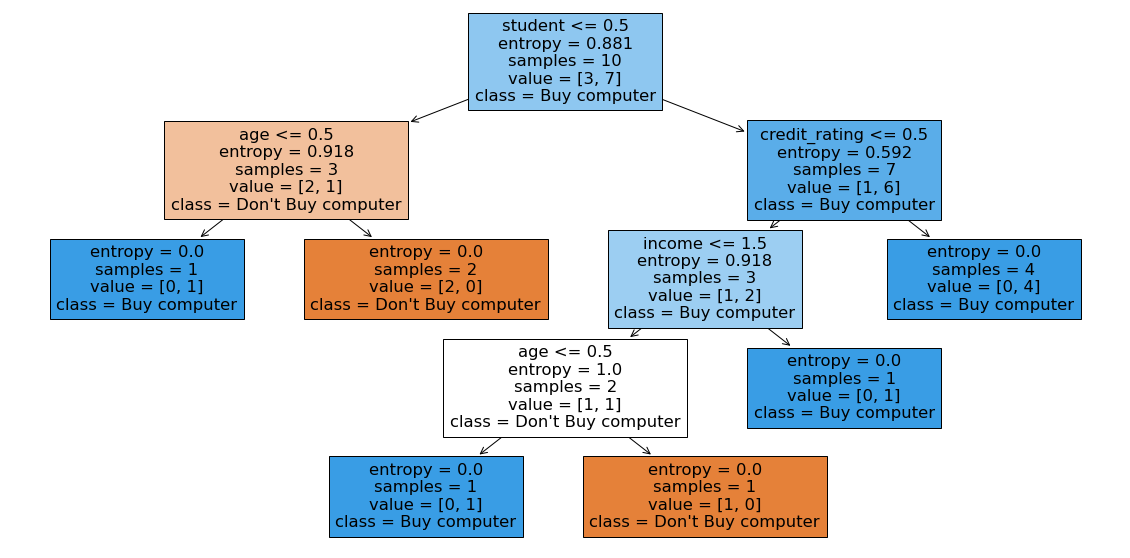

Train score is:  1.0
Test score is:  0.75


In [23]:



y = df_enc[:,-1] 
# y = 0 means Don't buy computers, y = 1 means buy computers
x = df_enc[:,0:-1] 
# age = [2 1 0] -> [youth senior middle_aged]
# income = [2 1 0] -> [medium low high]
# student = [1 0] -> [Yes no]
# credit_rating = [1 0] -> [fair excellent]

#split data
# Note: cuz not random split, so no need to import train_test_split
x_train , x_test = x[4:,:] , x[0:4,:]
y_train , y_test = y[4:] , y[0:4]

#create the decision tree classifier and train the clf
from sklearn import tree
clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=2,random_state=1)
clf = clf.fit(x_train,y_train)

#make prediction
y_predict = clf.predict(x_test)


#plot the tree out
plt.figure(figsize=(20,10))
tree.plot_tree(clf,feature_names=col_names[:4],class_names = ['Don\'t Buy computer','Buy computer'],filled=True) #not sure
plt.savefig("clf.png")
plt.show()

#accuracy of the clf
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_true = y_train, y_pred=clf.predict(x_train))
test_score = accuracy_score(y_true= y_test, y_pred=y_predict)
print('Train score is: ',train_score)
print('Test score is: ',test_score)


# **Q1 (b)**


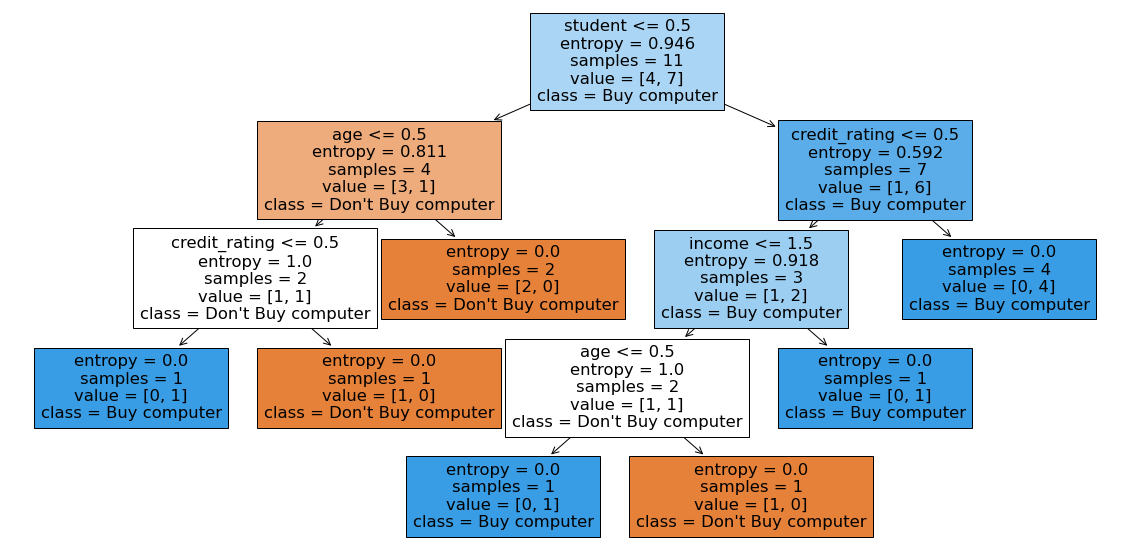

Train score is:  1.0
Test score is:  0.5


In [24]:
noise_data_x = [[0,1,0,1]]
noise_data_y = [0]

noised_x_train = np.append(x_train,noise_data_x,axis=0)
noised_y_train = np.append(y_train,noise_data_y)

noised_clf = clf.fit(noised_x_train,noised_y_train)

#make prediction
noised_y_predict = noised_clf.predict(x_test)


#plot the tree out
plt.figure(figsize=(20,10))
tree.plot_tree(noised_clf,feature_names=col_names[:4],class_names = ['Don\'t Buy computer','Buy computer'],filled=True) #not sure
plt.savefig("clf.png")
plt.show()

#accuracy of the clf
from sklearn.metrics import accuracy_score
noised_train_score = accuracy_score(y_true = noised_y_train, y_pred=noised_clf.predict(noised_x_train))
noised_test_score = accuracy_score(y_true= y_test, y_pred=noised_y_predict)
print('Train score is: ',noised_train_score)
print('Test score is: ',noised_test_score)

# **Q1 (c)**

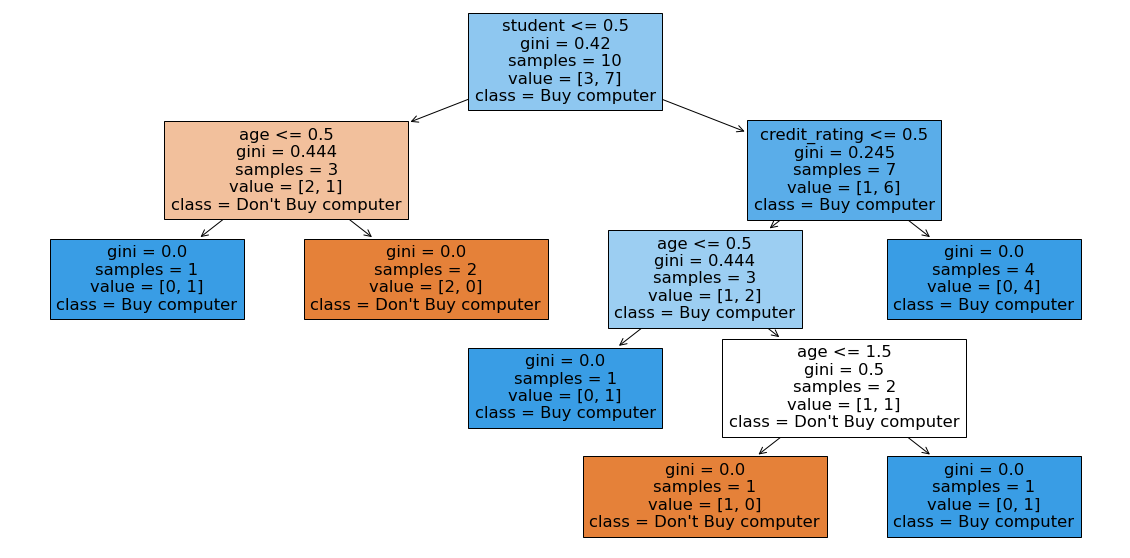

Train score is:  1.0
Test score is:  0.75


In [25]:
#data preprocessing -> Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype = int)
enc.fit(df[col_names])

df_enc = enc.transform(df[col_names])

y = df_enc[:,-1] 
# y = 0 means Don't buy computers, y = 1 means buy computers
x = df_enc[:,0:-1] 
# age = [2 1 0] -> [youth senior middle_aged]
# income = [2 1 0] -> [medium low high]
# student = [1 0] -> [Yes no]
# credit_rating = [1 0] -> [fair excellent]

#split data
# Note: cuz not random split, so no need to import train_test_split
x_train , x_test = x[4:,:] , x[0:4,:]
y_train , y_test = y[4:] , y[0:4]

#create the decision tree classifier and train the clf
from sklearn import tree
clf = sklearn.tree.DecisionTreeClassifier(min_samples_split=2)
clf = clf.fit(x_train,y_train)

#make prediction
y_predict = clf.predict(x_test)


#plot the tree out
plt.figure(figsize=(20,10))
tree.plot_tree(clf,feature_names=col_names[:4],class_names = ['Don\'t Buy computer','Buy computer'],filled=True) #not sure
plt.savefig("clf.png")
plt.show()

#accuracy of the clf
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_true = y_train, y_pred=clf.predict(x_train))
test_score = accuracy_score(y_true= y_test, y_pred=y_predict)
print('Train score is: ',train_score)
print('Test score is: ',test_score)


# **Q2**

In [26]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(alpha=0) #no laplace correction
clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

train_acc = sum(y_train_pred == y_train) / len(y_train)
test_acc = sum(y_test_pred == y_test) / len(y_test)

print("train acc: {:.2f}%; test acc: {:.2f}%".format(train_acc*100, test_acc*100))




train acc: 90.00%; test acc: 25.00%


C:\Users\kkaus\Anaconda3\envs\comp4331\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [27]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(alpha=0) #no laplace correction
clf.fit(noised_x_train,noised_y_train)

y_noised_train_pred = clf.predict(noised_x_train)
y_noised_test_pred = clf.predict(x_test)

noised_train_acc = sum(y_noised_train_pred == noised_y_train) / len(noised_y_train)
noised_test_acc = sum(y_test_pred == y_test) / len(y_test)

print("noised_train acc: {:.2f}%; noised_test acc: {:.2f}%".format(noised_train_acc*100, noised_test_acc*100))


noised_train acc: 81.82%; noised_test acc: 25.00%


C:\Users\kkaus\Anaconda3\envs\comp4331\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
